In [3]:
#!{sys.executable} -m pip install --upgrade deepracer-utils


In [26]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


In [27]:
from deepracer.tracks import TrackIO, Track, GeometryUtils, TrackPlotter
from deepracer.tracks.track_utils import track_breakdown, track_meta
import math
import numpy as np


In [28]:
tu = TrackIO()
track_name = "reinvent_base"
track: Track = tu.load_track(track_name)


Loaded 71 waypoints


<__array_function__ internals>:180: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.


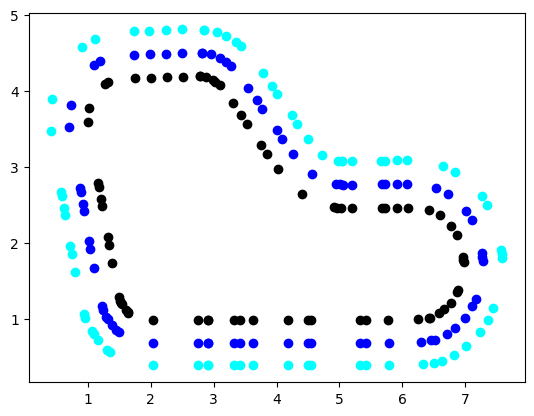

In [29]:
TrackPlotter.plot_track(track)


In [30]:
assert len(track.outer_border) == len(track.inner_border)
track.outer_border
track.inner_border

track_widths = []
for i, _ in enumerate(track.outer_border):
    track_widths.append(
        math.dist(track.outer_border[i], track.inner_border[i]))

track_widths[:5]


[0.6017725800257864,
 0.6017236843242613,
 0.6017117585434013,
 0.6016867135492646,
 0.6016199300307823]

In [31]:
max(track_widths), min(track_widths), sum(track_widths) / len(track_widths)


(0.6242015289254961, 0.5906041356688785, 0.6089869570222295)

In [32]:
def put_to_origin(closest_waypoint, the_second_closest_wp, furthest_waypoint) -> tuple:
    """Move all the vectors to the origin relative to the closest_waypoint"""
    new_closest_wp = (0, 0)
    new_second_closest_wp = (
        the_second_closest_wp[0] - closest_waypoint[0], the_second_closest_wp[1] - closest_waypoint[1])
    new_furthest_wp = (
        furthest_waypoint[0] - closest_waypoint[0], furthest_waypoint[1] - closest_waypoint[1])
    return (new_closest_wp,  new_second_closest_wp, new_furthest_wp)
    
tests = [
    {
        'data': ((-4, 8), (-4, 4), (-8, 4)),
        'expected_point': ((0, 0), (0, -4), (-4, -4))
    },
]

for test in tests:
    result = put_to_origin(*test['data'])
    
    for i, point in enumerate(result):
        expected_point = test['expected_point'][i]
        calculated_point = result[i]
        assert expected_point[0] == calculated_point[0] and expected_point[1] == calculated_point[1], f'Result {calculated_point} did not match expected value {expected_point}'
        print(f'For test {test["data"]}, expected value {expected_point} and got {calculated_point}')

For test ((-4, 8), (-4, 4), (-8, 4)), expected value (0, 0) and got (0, 0)
For test ((-4, 8), (-4, 4), (-8, 4)), expected value (0, -4) and got (0, -4)
For test ((-4, 8), (-4, 4), (-8, 4)), expected value (-4, -4) and got (-4, -4)


In [45]:
def angle_of_vectors(ab,cd):
    """Returns the angle of the vectors"""
    dot_product = ab[0]*cd[0] + ab[1]*cd[1]
    mod_of_vector_1 = math.sqrt( ab[0]** 2 + ab[1]** 2)*math.sqrt(cd[0] ** 2 + cd[1] ** 2) 
    angle = dot_product/mod_of_vector_1
    angle_in_degree = math.degrees(math.acos(angle))
    return angle_in_degree
 
tests = [
    {
        'data': ((8,6), (7,9)),
        'expected_angle': 15.255118703057764
    },
    {
        'data': ((8,6), (7,9)),
        'expected_angle': 15.255118703057764
    },
]

for test in tests:
    result = angle_of_vectors(test['data'][0], test['data'][1])
    expected_angle = test['expected_angle']
    calculated_angle = result
    assert expected_angle == calculated_angle, f'Result {calculated_angle} did not match expected value {expected_angle}'
    print(f'For test {test["data"]}, expected value {expected_angle} and got {calculated_angle}')

ab (8, 6) cd (7, 9)
Cosθ = 0.9647638212377322
θ = 15.255118703057764 °
For test ((8, 6), (7, 9)), expected value 15.255118703057764 and got 15.255118703057764
ab (8, 6) cd (7, 9)
Cosθ = 0.9647638212377322
θ = 15.255118703057764 °
For test ((8, 6), (7, 9)), expected value 15.255118703057764 and got 15.255118703057764


In [46]:
def rotate_around_origin(origin, point, angle, decimel_points=2) -> tuple:
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    angle = math.radians(angle)
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    
    return round(qx, decimel_points), round(qy, decimel_points)

tests = [
    {
        'data': ((0, 0), (-4, -4), 180),
        'expected_point': (4, 4)
    },
]


for test in tests:
    result = rotate_around_origin(*test['data'])
    
    for i, point in enumerate(result):
        expected_point = test['expected_point']
        calculated_point = result
        print('Result was,', result)
        assert expected_point[0] == calculated_point[0] and expected_point[1] == calculated_point[1], f'Result {calculated_point} did not match expected value {expected_point}'
        print(bcolors.OKGREEN + "Test Passes" + bcolors.ENDC)
        print(f'For test {test["data"]}, expected value {expected_point} and got {calculated_point}')


Calculating rotated point for  (0, 0) (-4, -4) 180
Result was, (4.0, 4.0)
Test Passes
For test ((0, 0), (-4, -4), 180), expected value (4, 4) and got (4.0, 4.0)
Result was, (4.0, 4.0)
Test Passes
For test ((0, 0), (-4, -4), 180), expected value (4, 4) and got (4.0, 4.0)


In [55]:
def transform_to_origin(closest_waypoint, the_second_closest_wp, furthest_waypoint) -> tuple:
    """Align the vectors so that the closest and second closest waypoint are 0 on the x axis. This depends on the closest waypoint having the coordinates origin at 0,0"""
    assert(closest_waypoint[0] == 0 and closest_waypoint[1] == 0 ,   'closest_waypoint[0] == 0 and closest_waypoint[1]', closest_waypoint[0] , closest_waypoint[1] )
    second_point_origin_dist = math.dist((0,0), the_second_closest_wp)
    second_point_transformed = (0, second_point_origin_dist)
    degrees_of_rotation_needed = angle_of_vectors(second_point_transformed, the_second_closest_wp)
    
    new_second_closest_wp = rotate_around_origin(closest_waypoint, the_second_closest_wp, degrees_of_rotation_needed)

    new_furthest_wp = rotate_around_origin(closest_waypoint, furthest_waypoint, degrees_of_rotation_needed)

    return ( closest_waypoint, new_second_closest_wp, new_furthest_wp )

tests = [
    {
        'data': ((0, 0), (0, -4), (-4, -4)),
        'expected_point': ((0, 0), (0, 4), (4, 4))
    },
]

for test in tests:
    result = transform_to_origin(*test['data'])
    print('Result', result,'Test', test)
    
    for i, point in enumerate(result):
        expected_point = test['expected_point'][i]
        calculated_point = result[i]
        assert expected_point[0] == calculated_point[0] and expected_point[1] == calculated_point[1], f'Result {calculated_point} did not match expected value {expected_point}'
        print(f'For test {test["data"]}, expected value {expected_point} and got {calculated_point}')

second_point_origin_dist 4.0
second_point_transformed (0, 4.0)
ab (0, 4.0) cd (0, -4)
Cosθ = -1.0
θ = 180.0 °
degrees_of_rotation_needed 180.0
Calculating rotated point for  (0, 0) (0, -4) 180.0
new_second_closest_wp (0.0, 4.0)
Calculating rotated point for  (0, 0) (-4, -4) 180.0
new_furthest_wp (4.0, 4.0)
Result ((0, 0), (0.0, 4.0), (4.0, 4.0))
Test {'data': ((0, 0), (0, -4), (-4, -4)), 'expected_point': ((0, 0), (0, 4), (4, 4))}
For test ((0, 0), (0, -4), (-4, -4)), expected value (0, 0) and got (0, 0)
For test ((0, 0), (0, -4), (-4, -4)), expected value (0, 4) and got (0.0, 4.0)
For test ((0, 0), (0, -4), (-4, -4)), expected value (4, 4) and got (4.0, 4.0)


<>:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipykernel_571098/3096884397.py:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(closest_waypoint[0] == 0 and closest_waypoint[1] == 0 ,   'closest_waypoint[0] == 0 and closest_waypoint[1]', closest_waypoint[0] , closest_waypoint[1] )


In [56]:


def get_angle_deg(closest_waypoint, the_second_closest_wp, furthest_waypoint):
    """Get angle in degrees"""
    
    closest_waypoint, the_second_closest_wp, furthest_waypoint = put_to_origin(closest_waypoint, the_second_closest_wp, furthest_waypoint)
    closest_waypoint, the_second_closest_wp, furthest_waypoint = transform_to_origin(closest_waypoint, the_second_closest_wp, furthest_waypoint)

    angle = math.degrees(math.atan2(
        furthest_waypoint[0], furthest_waypoint[1]))
    return angle


tests = [
    {
        'data': ((0, 0), (0, 5), (-5, 5)),
        'expected_ang': -45
    },
    {
        'data': ((0, 0), (0, 5), (-4, 0)),
        'expected_ang': -90
    },
    {
        'data': ((0, 0), (0, 5), (-5, 0)),
        'expected_ang': -90
    },
    {
        'data': ((0, 0), (0, 5), (-5, 0)),
        'expected_ang': -90
    },
    {
        'data': ((-5, 7), (-5, 4), (-8, 4)),
        'expected_ang': -45
    },
]

for test in tests:
    result = get_angle_deg(*test['data'])
    expected_angle = test['expected_ang']
    assert expected_angle == result, f'Result {result} did not match expected value {expected_angle}'
    print(f'For test {test}, expected value {expected_angle} and got {result}')


second_point_origin_dist 5.0
second_point_transformed (0, 5.0)
ab (0, 5.0) cd (0, 5)
Cosθ = 1.0
θ = 0.0 °
degrees_of_rotation_needed 0.0
Calculating rotated point for  (0, 0) (0, 5) 0.0
new_second_closest_wp (0.0, 5.0)
Calculating rotated point for  (0, 0) (-5, 5) 0.0
new_furthest_wp (-5.0, 5.0)

----- Getting angle in degrees -----
Inputs (0, 0) (0.0, 5.0) (-5.0, 5.0)
dist_cl_to_second term 5.0
dist_cl_to_last term 7.0710678118654755
dist_cl_to_last term 5.0
hypotenuse_from_first_to_last 7.0710678118654755
For test {'data': ((0, 0), (0, 5), (-5, 5)), 'expected_ang': -45}, expected value -45 and got -45.0
second_point_origin_dist 5.0
second_point_transformed (0, 5.0)
ab (0, 5.0) cd (0, 5)
Cosθ = 1.0
θ = 0.0 °
degrees_of_rotation_needed 0.0
Calculating rotated point for  (0, 0) (0, 5) 0.0
new_second_closest_wp (0.0, 5.0)
Calculating rotated point for  (0, 0) (-4, 0) 0.0
new_furthest_wp (-4.0, 0.0)

----- Getting angle in degrees -----
Inputs (0, 0) (0.0, 5.0) (-4.0, 0.0)
dist_cl_to_seco

AssertionError: Result 45.0 did not match expected value -45

In [57]:
angles = []
for i, _ in enumerate(track.center_line):
    is_last_index = i == len(track.center_line) - 1
    is_second_last_index = i == len(track.center_line) - 2
    last_index = i+1

    second_point = track.center_line[0]if is_last_index else track.center_line[last_index]

    third_point = track.center_line[0] if is_second_last_index else \
        track.center_line[1] \
        if is_last_index \
        else track.center_line[i+2]

    angles.append(get_angle_deg(
        track.center_line[i], second_point, third_point))

print(
    f'The individual angles stats are, right_max: {max(angles)}, left_max: {min(angles)}, mean: {sum(angles) / len(angles)}')


second_point_origin_dist 0.4099999737983747
second_point_transformed (0, 0.4099999737983747)
ab (0, 0.4099999737983747) cd (0.4099999475967513, 0.00014657874743240207)
Cosθ = 0.00035750916292615406
θ = 89.97951623339073 °
degrees_of_rotation_needed 89.97951623339073
Calculating rotated point for  (0, 0) (0.4099999475967513, 0.00014657874743240207) 89.97951623339073
new_second_closest_wp (0.0, 0.41)
Calculating rotated point for  (0, 0) (0.5099999348154709, 0.00018232966144038354) 89.97951623339073
new_furthest_wp (-0.0, 0.51)

----- Getting angle in degrees -----
Inputs (0, 0) (0.0, 0.41) (-0.0, 0.51)
dist_cl_to_second term 0.41
dist_cl_to_last term 0.51
dist_cl_to_last term 0.10000000000000003
hypotenuse_from_first_to_last 0.51
second_point_origin_dist 0.09999999360935947
second_point_transformed (0, 0.09999999360935947)
ab (0, 0.09999999360935947) cd (0.09999998721871961, 3.575091400798147e-05)
Cosθ = 0.0003575091629269402
θ = 89.97951623339068 °
degrees_of_rotation_needed 89.9795162

/tmp/ipykernel_571098/2958918671.py:9: RuntimeWarning: invalid value encountered in double_scalars
  angle = dot_product/mod_of_vector_1


In [22]:
CORNER_THRESHOLD_ANGLE = 0.5

corners = []
current_corner = {'id': 0}

for i, _ in enumerate(track.center_line):

    # is_last_index = i == len(track.center_line) -1

    second_point = track.center_line[0]if is_last_index else track.center_line[i+1]

    angles.append(get_angle_deg(track.center_line[i], second_point))

print(
    f'The individual angles stats are, max: {max(angles)}, min: {min(angles)}, mean: {sum(angles) / len(angles)}')


TypeError: get_angle_deg() missing 1 required positional argument: 'furthest_waypoint'